In [504]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 
import math as m
from matplotlib import pyplot as plt 

In [505]:
#math constants 
pi = 3.14159265359 
g = 9.81

In [506]:
#wheel velocity 

rpm = 2000
W = (rpm/60) * 2 * pi
r = 0.09
v0 = W * r * 0.55 
print(v0)

10.367255756847


In [507]:
#tennisbal constants

k = 0.125

C = 0.5
rho = 1.292
A = 0.003316625

cor = 0.66666
cof = 0.72

In [508]:
#launcher constants

theta = 28*pi/180
s0 = 0

In [509]:
#velocity

v0x = v0 * m.cos(theta)
vx = v0x
v0y = v0 * m.sin(theta)
print(v0x,v0y)

9.153743515060754 4.867131761968278


In [510]:
#time 

t = 0
tf = 3.0*v0y/g
dt = tf/2000

In [511]:
A = g/k

B = v0y + A

x = v0x/-k * m.exp(t*-k)
z = B/-k * m.exp(t*-k)-A*t

cx = -v0x/-k * m.exp(0*-k)
cy = B/-k * m.exp(0*-k)-A*0


In [512]:
i = 0 
x = []
z = []
y= []


In [513]:

#### first motion
while B/-k * m.exp(t*-k)-A*t-(cy-0.4) >= 0: 
        t = t + dt
        x.append(v0x/-k * m.exp(t*-k)+cx)
        z.append(B/-k * m.exp(t*-k)-A*t-(cy-0.4)) 
        #print(x[i],y[i])
        i = i + 1

In [514]:
v0x2 = v0x * cof
v0y2 = -(v0y-g*t) * cor

xref = x[i-1]

t = 0 
tf = 2.0*v0/g
dt = tf/2000

A = g/k

B = v0y2 + A

cx = -v0x2/-k * m.exp(0*-k)
cy = B/-k * m.exp(0*-k)-A*0


In [515]:
#### second motion

while B/-k * m.exp(t*-k)-A*t-(cy) >= 0:
        t = t + dt 
        x.append(v0x2 /-k * m.exp(t*-k)+cx + xref)
        z.append(B/-k * m.exp(t*-k)-A*t-cy) 
        #print(x[i],y[i])
        i = i + 1 

In [516]:
y = []


k = 0
while k <= len(x) - 1:
    y.append(2)
    k = k+1



In [517]:
df = pd.read_csv(r'C:\Users\Gebruiker\Documents\GitHub\Tennisballauncher\Trackerdata2000.csv')

In [518]:
df_x = df[['Ax','Bx','Cx','Dx','Ex','Fx','Gx','Hx','Ix','Jx','Kx','Lx','Mx','Nx','Ox','Px','Qx','Rx','Sx','Tx','Ux','Vx','Wx','Xx','Yx','Zx']].copy()
df_x_gemiddelde = df_x.mean(numeric_only=True, axis=1)
df_x_gemiddelde

0     0.177969
1     0.491231
2     0.804923
3     1.117308
4     1.441769
5     1.741000
6     2.063923
7     2.361885
8     2.681731
9     2.986923
10    3.287654
11    3.590038
12    3.887423
13    4.181154
14    4.474077
15    4.762885
16    5.039538
17    5.335846
18    5.618577
19    5.888577
20    6.179192
21    6.457077
22    6.731885
23    7.006423
24    7.277731
25    7.547269
26    7.814923
27    8.077038
28    8.337923
29    8.591731
30    8.806731
dtype: float64

In [519]:
df_y = df.drop(columns=['Ax','Bx','Cx','Dx','Ex','Fx','Gx','Hx','Ix','Jx','Kx','Lx','Mx','Nx','Ox','Px','Qx','Rx','Sx','Tx','Ux','Vx','Wx','Xx','Yx','Zx'])
df_y_gemiddelde = df_y.mean(numeric_only=True, axis=1)
df_y_gemiddelde

0     0.457538
1     0.616154
2     0.762462
3     0.897231
4     1.024731
5     1.130231
6     1.230346
7     1.311692
8     1.384500
9     1.444654
10    1.490692
11    1.526615
12    1.551077
13    1.561846
14    1.561808
15    1.551385
16    1.531269
17    1.497731
18    1.453846
19    1.401308
20    1.333231
21    1.253192
22    1.168269
23    1.068308
24    0.956000
25    0.832423
26    0.697538
27    0.551192
28    0.395000
29    0.229765
30    0.080695
dtype: float64

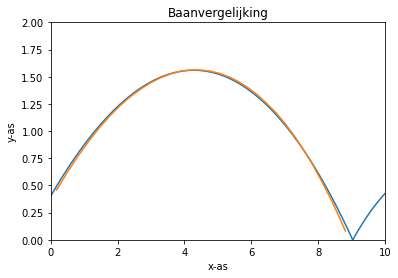

In [520]:

plt.xlim(0, 10)
plt.ylim(0, 2)
plt.title("Baanvergelijking")
plt.ylabel("y-as")
plt.xlabel("x-as")
plt.plot(x,z)
plt.plot(df_x_gemiddelde,df_y_gemiddelde)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


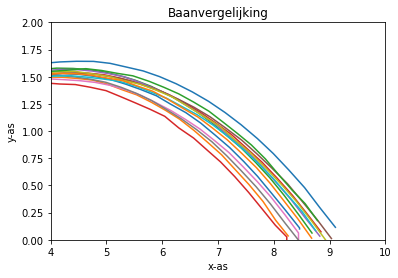

In [521]:

plt.xlim(4, 10)
plt.ylim(0, 2)
plt.title("Baanvergelijking")
plt.ylabel("y-as")
plt.xlabel("x-as")
plt.plot(df["Ax"],df["Ay"],label = "Test A")
plt.plot(df["Bx"],df["By"],label = "Test B")
plt.plot(df["Cx"],df["Cy"],label = "Test C")
plt.plot(df["Dx"],df["Dy"],label = "Test D")
plt.plot(df["Ex"],df["Ey"],label = "Test E")
plt.plot(df["Fx"],df["Fy"],label = "Test F")
plt.plot(df["Gx"],df["Gy"],label = "Test G")
plt.plot(df["Hx"],df["Hy"],label = "Test H")
plt.plot(df["Ix"],df["Iy"],label = "Test I")
plt.plot(df["Jx"],df["Jy"],label = "Test J")
plt.plot(df["Kx"],df["Ky"],label = "Test K")
plt.plot(df["Lx"],df["Ly"],label = "Test L")
plt.plot(df["Mx"],df["My"],label = "Test M")
plt.plot(df["Nx"],df["Ny"],label = "Test N")
#plt.plot(x,z , "-k", label = "Simulatie")
#plt.legend(loc="upper right")
l = []
i = 0
while i <= 31 -1 :
    l.append(2)
    i = i+1
print(l)

In [522]:
df

,Ax,Ay,Bx,By,Cx,Cy,Dx,Dy,Ex,Ey,...,Vx,Vy,Wx,Wy,Xx,Xy,Yx,Yy,Zx,Zy
0,0.265,0.516,0.0368,0.4050,0.180,0.4770,0.0121,0.378,0.258,0.5100,...,0.205,0.475,0.127,0.42000,0.128,0.426,0.199,0.450,0.217,0.470
1,0.581,0.670,0.3540,0.5670,0.489,0.6280,0.3100,0.538,0.566,0.6710,...,0.534,0.633,0.435,0.58100,0.453,0.596,0.513,0.612,0.539,0.630
2,0.891,0.808,0.6580,0.7080,0.800,0.7780,0.6320,0.679,0.869,0.8140,...,0.840,0.781,0.738,0.72400,0.766,0.757,0.848,0.762,0.849,0.783
3,1.210,0.940,0.9650,0.8410,1.106,0.9180,0.9600,0.830,1.173,0.9480,...,1.157,0.918,1.036,0.85300,1.089,0.896,1.162,0.894,1.165,0.934
4,1.520,1.058,1.2710,0.9630,1.417,1.0390,1.2760,0.959,1.476,1.0610,...,1.484,1.047,1.342,0.97100,1.402,1.028,1.487,1.023,1.481,1.057
5,1.828,1.163,1.5780,1.0720,1.720,1.1490,1.5900,1.070,1.779,1.1650,...,1.804,1.152,1.640,1.07800,1.729,1.153,1.809,1.136,1.797,1.175
6,2.138,1.247,1.8850,1.1730,2.026,1.2450,1.9090,1.176,2.085,1.2570,...,2.115,1.260,1.943,1.18000,2.045,1.261,2.121,1.233,2.111,1.274
7,2.446,1.325,2.1870,1.2570,2.330,1.3310,2.2290,1.260,2.392,1.3340,...,2.432,1.351,2.242,1.25500,2.368,1.357,2.438,1.313,2.418,1.370
8,2.750,1.385,2.4810,1.3320,2.631,1.4040,2.5420,1.338,2.690,1.4010,...,2.746,1.431,2.545,1.32200,2.686,1.432,2.747,1.386,2.732,1.442
9,3.052,1.441,2.7800,1.3890,2.940,1.4570,2.8590,1.404,2.999,1.4630,...,3.064,1.490,2.838,1.37800,3.005,1.509,3.061,1.445,3.036,1.514


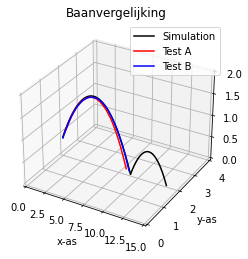

In [523]:
ax = plt.figure().add_subplot(projection='3d')
#ax.plot(x, y ,z)
ax.plot(x,y,z, "-k", label = "Simulation")
ax.plot(df["Ax"],l,df["Ay"],"-r",label = "Test A" )
ax.plot(df["Dx"],l,df["Dy"],"-b",label = "Test B")
plt.legend(loc="upper right")
ax.set_zlim(0,2)
plt.xlim(0, 15)
plt.ylim(0, 4)
plt.title("Baanvergelijking")
plt.ylabel("y-as")
plt.xlabel("x-as")
plt.show()